<a href="https://colab.research.google.com/github/Akazz-L/simple_NN/blob/master/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural network - Getting started

---
Getting good fundations on neural network's key concepts is required to understand more complex architecture. On this notebook, a simple neural network is built to give a better insight on notions like inputs forwarding, backpropagation, training parameters, learning rate ...

The required knowledge is basic mathematical concepts and especially gradients' computation.

For simplicity, the neural network is implemented with **Numpy** only. Below can be found the neural network we are going to train.



**Neural network architecture** 
 - Input layer ( 3 neurons)
 - Hidden layer 1 ( 2 neurons)
 - Output layer (2 neurons)

 The hidden layer and the output layer both have sigmoid function as activation function. Below are the equations that defines the layers. These equations are what the neural network uses to forward the inputs through the model.



<center>

![Texte alternatif…](https://drive.google.com/uc?id=1m3SGZju8yiXJYQ0HHba10xMujYrYoF28)

</center>

**Activation function (Sigmoid)**

\begin{equation*}
σ(x) = \frac{1}{1 + e^{-x}}\\ 
\end{equation*}
**Hidden layer**

\begin{align*}
 &\text{first neuron} & &\text{second neuron} \\ \\
z_1 &= w_1x_1 + w_3x_2 + w_5x_3   + b_1 &  z_2 &= w_2x_1 + w_4x_2 + w_6x_3   + b_1  \\  
a_1 &= \frac{1}{1 + e^{-z_1}}& a_2 &= \frac{1}{1 + e^{-z_2}}  \\  
\end{align*} 

**Output layer**

\begin{align*}
 &\text{first neuron} & &\text{second neuron} \\ \\
z_o1 &= w_7a_1 + w_9a_2   + b_2 &  z_o2 &= w_8a_1 + w_10a_2   + b_2  \\  
o_1 &= \frac{1}{1 + e^{-z_o1}}& o_2 &= \frac{1}{1 + e^{-z_o2}}  \\  
\end{align*} 


<ins>Initial weights and bias</ins>: <br /><br />
The weights and the biases are the model's parameters we want to find using our samples data. In the training process, the weights will be updated helping the model to understand to what extent a specific input is important to the task we want to achieve. As we don't have any idea on the optimal values we randomly initialize the weights and the biases.


$w1 = 0.1$ ;
$w2 = 0.2$ ;
$w3 = 0.3$ ;
$w4 = 0.4$ ;
$w5 = 0.5$ ;
$w6 = 0.6$ ; 
$b1 = 0.5$ ;


$w7 = 0.7$ ;
$w8 = 0.8$ ;
$w9 = 0.9$ ;
$w10 = 0.1$ ;
$b2 = 0.5$ ;

<ins> Task Example sample</ins> : <br /><br />
In this tutorial, we are considering a very simple task which is to **map one specific $\mathbb{R}^3$ sample into $\mathbb{R}^2$**.

input :
$x1 = 1$ ;
$x2 = 4$ ;
$x3 = 5$ ;

target : 
$y1 = 0$ ;
$y2 = 1$ ;


In [ ]:
 # Import packages
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Initialize weights and bias
def initParams():
  w1 = 0.1
  w2 = 0.2
  w3 = 0.3
  w4 = 0.4
  w5 = 0.5
  w6 = 0.6
  b1 = 0.5

  w7 = 0.7
  w8 = 0.8
  w9 = 0.9
  w10 = 0.1
  b2 = 0.5

  weights = [w1,w2,w3,w4,w5,w6,w7,w8,w9,w10]
  biases = [b1, b2]
  return [weights, biases]

weights, biases = initParams()

In [ ]:
# Activation function - sigmoid
def sigmoid(x):
  return np.divide(1, (1 + np.exp(-x)))

In [ ]:
# Initialize sample
x1 = 1
x2 = 4
x3 = 5

sample = [x1, x2, x3]
target = [0, 1]

In [ ]:
# Forward input to the neural network
def forward(input, weights, biases):
  # weighted inputs
  z1 = weights[0] * input[0] + weights[2] * input[1] + weights[4] * input[2] + biases[0]
  z2 = weights[1] * input[0] + weights[3] * input[1] + weights[5] * input[2] + biases[0]
  
  # activation
  a1 = sigmoid(z1) 
  a2 = sigmoid(z2)

  # weighted hidden layer neurons
  zo1 = weights[6] * a1 + weights[8] * a2 + biases[1]
  zo2 = weights[7] * a1 + weights[9] * a2 + biases[1]

  # final outputs
  o1 = sigmoid(zo1)
  o2 = sigmoid(zo2)

  return a1,a2, o1, o2

  

###Loss function
The loss function quantifies how close the neural network's output is from the target's value. This value is the last computation the network does before actually learning from the sample and updating the network "knowledge" through backpropagation and network's parameters update. In the below example we use the Mean-Square Error as loss function.

\begin{equation*}
\text{General equation} \hspace{10mm}     MSE = \frac{1}{n}{\sum\limits_{i=1}^n (predicted_i - target_i)^2} \\
\end{equation*}

\begin{equation*}
\text{One-sample equation} \hspace{10mm}     MSE = \frac{1}{2}{(o_1-y_1) ^2 + (o_2-y_2) ^2}
\end{equation*}




In [ ]:
# Calculate mse loss from the output and the target

def mse_loss(outputs, targets):
  return 0.5 * ( np.power(outputs[0] - targets[0], 2)  + np.power(outputs[1] - targets[1], 2))

###Backpropagation
Once the loss is computed from the sample input, weights must be updated progressively from the network's outputs to the inputs using gradient descent technique.

Lets take an example on weight $w_7$. <br> 
$\frac{\partial L}{\partial w_7} = \frac{\partial L}{\partial o_1} . \frac{\partial o_1}{\partial z_o1}.\frac{\partial z_o1}{\partial w_7} $ 

Where : <br><br>
$\frac{\partial z_o1}{\partial w_7}  = a_1$  which is the result of the hidden layer activation function during the sample forwarding phase<br><br>
$\frac{\partial o_1}{\partial z_o1}  = σ(z_o1) * (1 - σ(z_o1)) = o_1 * (1 - o_1)$  <br><br>
$ \frac{\partial L}{\partial o_1} = o_1 - y_1$ <br><br>

After computing all the weights and biases gradients, they can be updated depending on the learning rate which represent how fast the parameters should be updated.

For example $w_7$ will be updated using the following expression :
  $ w_7 = w_7 - $ learning_rate $. \frac{\partial L}{\partial w_7} $

In [ ]:
# Backpropation
# Compute gradients for each parameters (weights and bias)

def backpropagate(weights,hidden_activations, outputs, targets):
  weights_grad = []
  biases_grad = []

  ##### Output layer weights and bias

  # Calculate dL / dw7 
  dL_do1 = outputs[0] - targets[0]
  do1_dzo1 = outputs[0] * (1 - outputs[0])
  dzo1_dw7 = hidden_activations[0]

  dL_dw7 = dL_do1 * do1_dzo1 * dzo1_dw7

  # Calculate dL / dw8 
  dL_do2 = outputs[1] - targets[1]
  do2_dzo2 = outputs[1] * (1 - outputs[1])
  dzo2_dw8 = hidden_activations[0]

  dL_dw8 = dL_do2 * do2_dzo2 * dzo2_dw8

  # Calculate dL / dw9 
  dzo1_dw9 = hidden_activations[1]

  dL_dw9 = dL_do1 * do1_dzo1 * dzo1_dw9

  # Calculate dL / dw9 
  dzo2_dw10 = hidden_activations[1]

  dL_dw10 = dL_do2 * do2_dzo2 * dzo2_dw10

  # Calculate dL / db2
  dzo1_db2 = 1
  dzo2_db2 = 1
  dL_db2 = dL_do1 * do1_dzo1 * dzo1_db2 + dL_do2 * do2_dzo2 * dzo2_db2

  ##### Hidden layer weights and bias

  # Calculate w1, w3, w5 gradients
  # 1. Calculate dL / da1
  dzo1_da1 = weights[6] #w7
  dzo2_da1 = weights[7] #w8
  dL_da1 = dzo1_da1 * do1_dzo1 * dL_do1 + dzo2_da1 * do2_dzo2 * dL_do2
  # 2. Calculate gradients that depends on activation 1 (a1) :  dL / dw1, dL / dw3, dL / dw5
  da1_dz1 = hidden_activations[0] * (1 - hidden_activations[0])

  dz1_dw1 = x1
  dL_dw1 = dL_da1 * da1_dz1 * dz1_dw1

  dz1_dw3 = x2
  dL_dw3 = dL_da1 * da1_dz1 * dz1_dw3

  dz1_dw5 = x3
  dL_dw5 = dL_da1 * da1_dz1 * dz1_dw5

  # Calculate w2, w4, w6 gradients
  # 1. Calculate dL / da2
  dzo1_da2 = weights[8] #w9
  dzo2_da2 = weights[9] #w10
  dL_da2 = dzo1_da2 * do1_dzo1 * dL_do1 + dzo2_da2 * do2_dzo2 * dL_do2

  # 2. Calculate gradients that depends on activation 2 (a2) : dL / dw2, dL / dw4, dL / dw6
  da2_dz2 = hidden_activations[1] * (1 - hidden_activations[1])

  dz2_dw2 = x1
  dL_dw2 = dL_da2 * da2_dz2 * dz2_dw2

  dz2_dw4 = x2
  dL_dw4 = dL_da2 * da2_dz2 * dz2_dw4

  dz2_dw6 = x3
  dL_dw6 = dL_da2 * da2_dz2 * dz2_dw6


  # Calculate dL / db1
  dz1_db1 = 1
  dz2_db1 = 1

  dL_db1 = (dz1_db1 * da1_dz1 * dzo1_da1 * do1_dzo1 * dL_do1 )+ (dz2_db1 * da2_dz2 * dzo2_da2 * do2_dzo2 * dL_do2)

  # Push weights and biases
  weights_grad = [dL_dw1, dL_dw2, dL_dw3, dL_dw4, dL_dw5, dL_dw6, dL_dw7, dL_dw8, dL_dw9, dL_dw10]
  biases_grad =  [dL_db1, dL_db2]

  return weights_grad, biases_grad


In [ ]:
# Update weights and biases using the gradients computed during the backprogation

def updateParams(weights, weights_grad, biases, biases_grad,learning_rate):
  weights[0] = weights[0] - learning_rate * weights_grad[0]
  weights[1] = weights[1] - learning_rate * weights_grad[1]
  weights[2] = weights[2] - learning_rate * weights_grad[2]
  weights[3] = weights[3] - learning_rate * weights_grad[3]
  weights[4] = weights[4] - learning_rate * weights_grad[4]
  weights[5] = weights[5] - learning_rate * weights_grad[5]
  weights[6] = weights[6] - learning_rate * weights_grad[6]
  weights[7] = weights[7] - learning_rate * weights_grad[7]
  weights[8] = weights[8] - learning_rate * weights_grad[8]
  weights[9] = weights[9] - learning_rate * weights_grad[9]


  biases[0] = biases[0] - learning_rate * biases_grad[0] 
  biases[1] = biases[1] - learning_rate * biases_grad[1]

  return weights, biases

#Training

For this tutorial, **we will train the model on only one sample which means the model is going to learn the best weights and biases to output the target's values for this specific sample**. Training a neural network can be boiled down to 4 steps :


1.   Forward the inputs through the network
2.   Calculate the loss
3.   Backpropagation
4.   Update the parameters


In [ ]:
# Define the number of iterations 
NB_ITER = 1000
LEARNING_RATE = 0.01

losses = []

# Train the model by forwarding the sample into the model -NB_ITER times

def train(nb_iterations, sample, target, weights, biases):

  for i in range(NB_ITER):
    # 1. Forward the input into the network
    a1, a2, o1, o2 = forward(sample, weights, biases)
    hidden_activations = [a1,a2]
    outputs = [o1,o2]

    # 2. Calculate the loss error
    error = mse_loss(outputs, target)
    losses.append(error)

    # 3. Backpropagate and compute the gradients
    weights_grad, biases_grad = backpropagate(weights,hidden_activations, outputs, target)

    # 4. Update the parameters
    weights, biases = updateParams(weights, weights_grad, biases, biases_grad, LEARNING_RATE)


  # Plot loss function
  plt.plot(losses)
  plt.title("Loss function")
  plt.show()


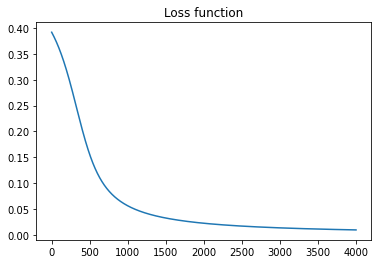

In [ ]:
# By running this cell more than once, the loss is going to decrease more and more and the model will finally achieve more accurate result on the sample target prediction

train(NB_ITER, sample, target, weights, biases)



# Inference

In [ ]:
# The inference is the model's prediction on one specific sample. No weights update is done here.
# When the running cell is run several times, the first output is decreasing to 0 and the second output is increasing to 1 which are the target value.
_, _, o1,o2 = forward(sample,weights,biases)
print(" Current Model Weights : {}".format(weights))
print(" Current Model Biases : {}".format(biases))
print("Outputs : {}, {}".format(o1,o2))
print("Targets : {}, {}".format(target[0], target[1]))



 Current Model Weights : [0.10877894184345083, 0.19858406291646138, 0.3351157673738029, 0.39433625166584874, 0.5438947092172512, 0.592920314582307, -1.1923150211797253, 1.8139652404391722, -1.0337286258467253, 1.1617168626701866]
 Current Model Biases : [0.49164167782683604, -0.3753406834922189]
Outputs : 0.07012867904002121, 0.9293773431188104
Targets : 0, 1


# Parameters initialization
The neural network weights and biases intialization is important regarding the training speed. On the previous example, with the random parameters, it takes approximately 1500 iterations to reach convergence. If weights based on assumptions are used the traning time can be a lot faster.



In [ ]:
# Initialize weights and biases with the their values after 7000 iterations
weights = [0.10877894184345083, 0.19858406291646138, 0.3351157673738029, 0.39433625166584874, 0.5438947092172512, 0.592920314582307, -1.1923150211797253, 1.8139652404391722, -1.0337286258467253, 1.1617168626701866]
biases = [0.49164167782683604, -0.3753406834922189]
losses = []


In [ ]:
# Lets infer on this new model's parameters initialization. 
# Because the weights/biases are correctly initialized, the model prediction are quite accurate without any training.
_, _, o1,o2 = forward(sample,weights,biases)
print("Outputs : {}, {}".format(o1,o2))
print("Targets : {}, {}".format(target[0], target[1]))

Outputs : 0.07012867904002121, 0.9293773431188104
Targets : 0, 1


#Learning rate effects
The learning rate sets how big the step toward the loss minimum will be during each training iterations.

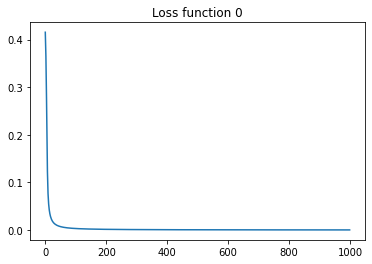

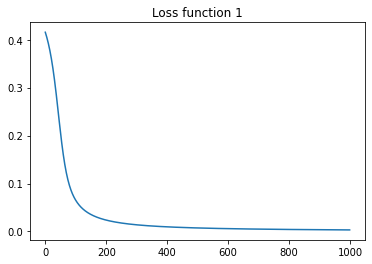

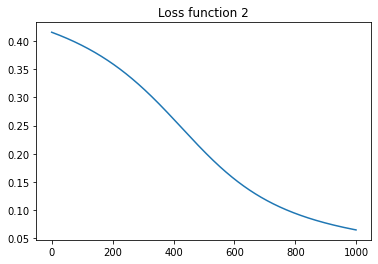

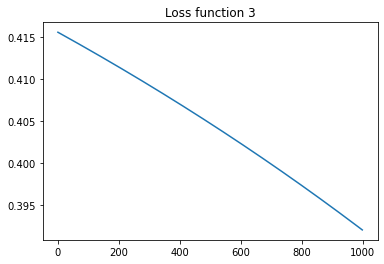

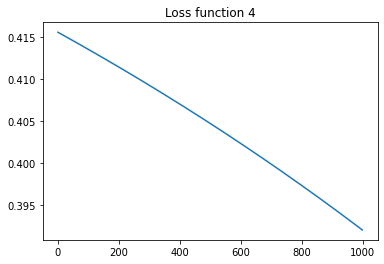

In [ ]:

NB_ITER = 1000
learning_rates = [1,0.1,0.01,.001,.001]

for index, learning_rate in enumerate(learning_rates):
  weights, biases = initParams()
  losses = []

  # Training
  for i in range(NB_ITER):
    # Forward the input into the network
    a1, a2, o1, o2 = forward(sample, weights, biases)
    hidden_activations = [a1,a2]
    outputs = [o1,o2]

    # Calculate the loss error
    error = mse_loss(outputs, target)
    losses.append(error)

    # Backpropagate and compute the gradients
    weights_grad, biases_grad = backpropagate(weights,hidden_activations, outputs, target)

    # Update the parameters
    weights, biases = updateParams(weights, weights_grad, biases, biases_grad, learning_rate)


  # Plot loss function
  plt.plot(losses)
  plt.title("Loss function {}".format(index))
  plt.show()